In [1]:
import os
os.chdir("C:/Users/MANEESHA/Desktop/final project 2020/dataset")
os.getcwd()

'C:\\Users\\MANEESHA\\Desktop\\final project 2020\\dataset'

# Importing Libraries


In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [3]:
data1=pd.read_csv("train.csv")

In [4]:

data1

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \r\n\r\nThat...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \r\n\r\nUmm, theres no actual article ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
data1.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data1.cov()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,0.086659,0.009038,0.044596,0.002527,0.041292,0.007316
severe_toxic,0.009038,0.009896,0.008978,0.000672,0.008098,0.001874
obscene,0.044596,0.008978,0.050145,0.001728,0.035959,0.006001
threat,0.002527,0.000672,0.001728,0.002987,0.001776,0.000588
insult,0.041292,0.008098,0.035959,0.001776,0.046927,0.006835
identity_hate,0.007316,0.001874,0.006001,0.000588,0.006835,0.008727


In [7]:
data1.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [8]:
data1.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

# Data visualization


In [9]:
!pip install matplotlib_venn

In [10]:
!pip install wordcloud

In [11]:
!pip install stopwords

In [12]:
!pip install collections_extended

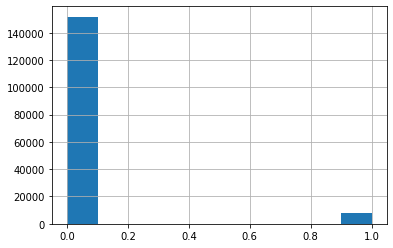

In [13]:
data1['insult'].hist(bins=10)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
%matplotlib inline

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

from wordcloud import WordCloud

from collections import Counter
import re
import string
from nltk.corpus import stopwords

(159571, 9)
['id' 'comment_text' 'toxic' 'severe_toxic' 'obscene' 'threat' 'insult'
 'identity_hate' 'none']


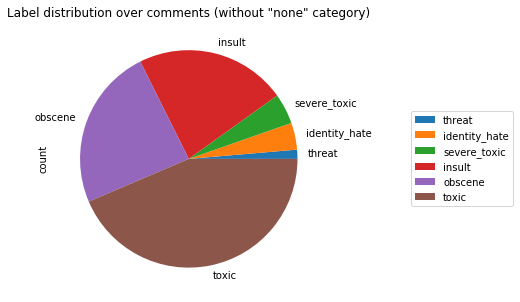

In [16]:

COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# Adding 'none' columns if there is no '1' in COLUMNS
data1['none'] = (data1[COLUMNS].max(axis=1) == 0).astype(int)
COLUMNS.append('none')
CATEGORIES = COLUMNS.copy()

print(data1.shape)
print(data1.columns.values)

df_distribution = data1[COLUMNS].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.drop('none').plot.pie(y='count',
                                      title='Label distribution over comments (without "none" category)',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3,0.5))

In [17]:

df_distribution.sort_values('count', ascending=False)

,count
none,143346
toxic,15294
obscene,8449
insult,7877
severe_toxic,1595
identity_hate,1405
threat,478


In [18]:
df_comb = data1.groupby(COLUMNS)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
df_comb.head(n=10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,count
0,0,0,0,0,0,0,1,143346
1,1,0,0,0,0,0,0,5666
2,1,0,1,0,1,0,0,3800
3,1,0,1,0,0,0,0,1758
4,1,0,0,0,1,0,0,1215
5,1,1,1,0,1,0,0,989
6,1,0,1,0,1,1,0,618
7,0,0,1,0,0,0,0,317
8,0,0,0,0,1,0,0,301
9,1,1,1,0,1,1,0,265


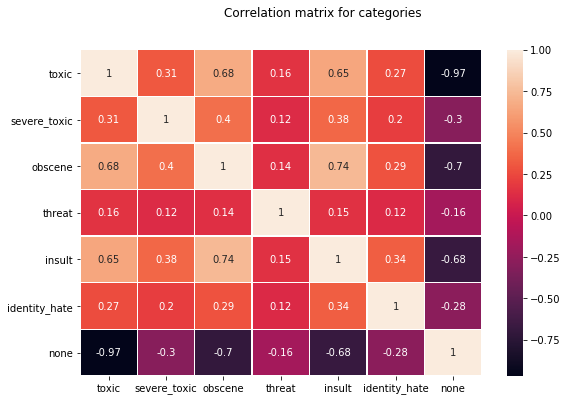

In [19]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(data1[COLUMNS].corr(), annot=True, linewidths=.5, ax=ax)

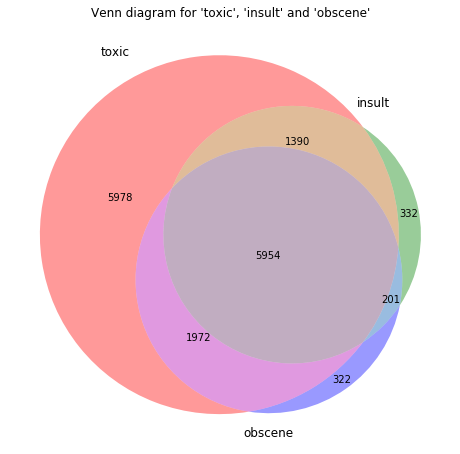

In [20]:
t = data1[(data1['toxic'] == 1) & (data1['insult'] == 0) & (data1['obscene'] == 0)].shape[0]
i = data1[(data1['toxic'] == 0) & (data1['insult'] == 1) & (data1['obscene'] == 0)].shape[0]
o = data1[(data1['toxic'] == 0) & (data1['insult'] == 0) & (data1['obscene'] == 1)].shape[0]

t_i = data1[(data1['toxic'] == 1) & (data1['insult'] == 1) & (data1['obscene'] == 0)].shape[0]
t_o = data1[(data1['toxic'] == 1) & (data1['insult'] == 0) & (data1['obscene'] == 1)].shape[0]
i_o = data1[(data1['toxic'] == 0) & (data1['insult'] == 1) & (data1['obscene'] == 1)].shape[0]

t_i_o = data1[(data1['toxic'] == 1) & (data1['insult'] == 1) & (data1['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), 
      set_labels=('toxic', 'insult', 'obscene'))
plt.show()

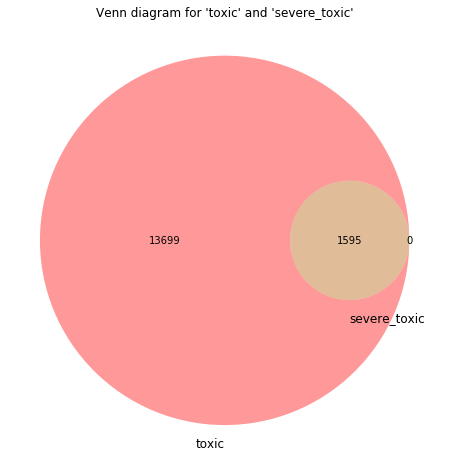

In [21]:
t = data1[(data1['toxic'] == 1) & (data1['severe_toxic'] == 0)].shape[0]
s = data1[(data1['toxic'] == 0) & (data1['severe_toxic'] == 1)].shape[0]

t_s = data1[(data1['toxic'] == 1) & (data1['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))
plt.show()

In [22]:
data1['total_length'] = data1['comment_text'].str.len()
data1['new_line'] = data1['comment_text'].str.count('\n'* 1)
data1['new_small_space'] =data1['comment_text'].str.count('\n'* 2)
data1['new_medium_space'] = data1['comment_text'].str.count('\n'* 3)
data1['new_big_space'] = data1['comment_text'].str.count('\n'* 4)

data1['new_big_space'] = data1['comment_text'].str.count('\n'* 4)
data1['uppercase_words'] = data1['comment_text'].apply(lambda l: sum(map(str.isupper, list(l))))
data1['question_mark'] = data1['comment_text'].str.count('\?')
data1['exclamation_mark'] = data1['comment_text'].str.count('!')

FEATURES = ['total_length', 
            'new_line', 
            'new_small_space', 
            'new_medium_space', 
            'new_big_space', 
            'uppercase_words',
            'question_mark',
            'exclamation_mark']
COLUMNS += FEATURES

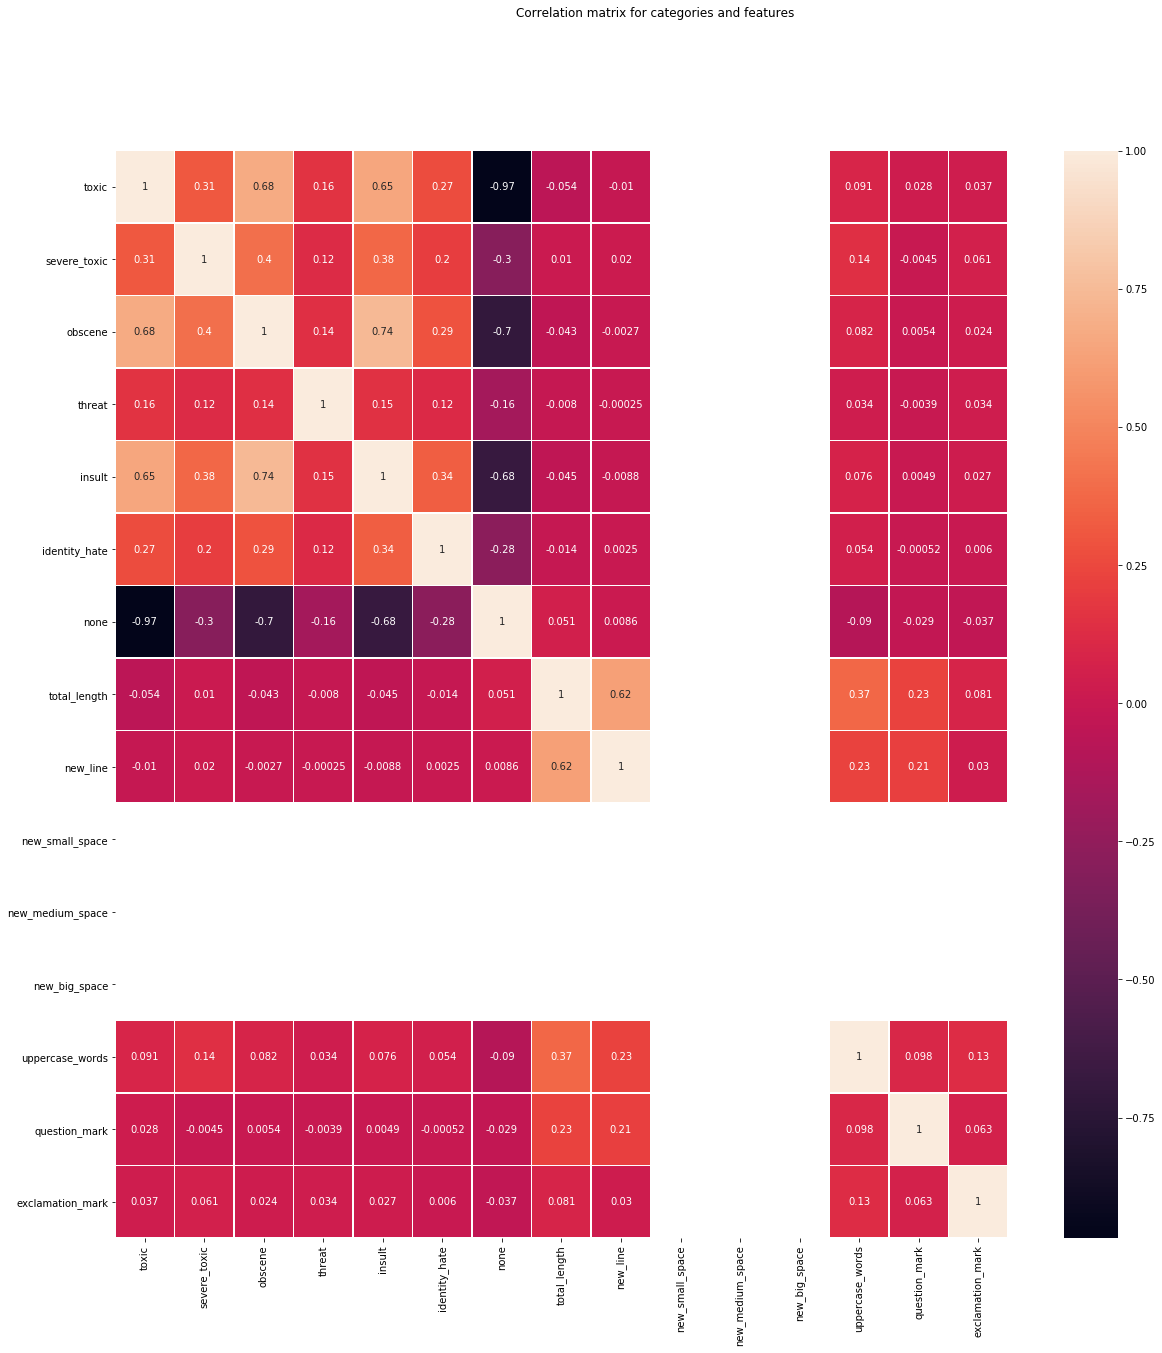

In [23]:

f, ax = plt.subplots(figsize=(20, 20))
f.suptitle('Correlation matrix for categories and features')
sns.heatmap(data1[COLUMNS].corr(), annot=True, linewidths=.5, ax=ax)

# Word Analysis


In [24]:
stop = stopwords.words('english')


sns.set(style="white", context="talk")

In [25]:
word_counter = {}


def clean_text(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stop)])

for categ in CATEGORIES:
    d = Counter()
    data1[data1[categ] == 1]['comment_text'].apply(lambda t: d.update(clean_text(t).split()))
    word_counter[categ] = pd.DataFrame.from_dict(d, orient='index')\
                                        .rename(columns={0: 'count'})\
                                        .sort_values('count', ascending=False)

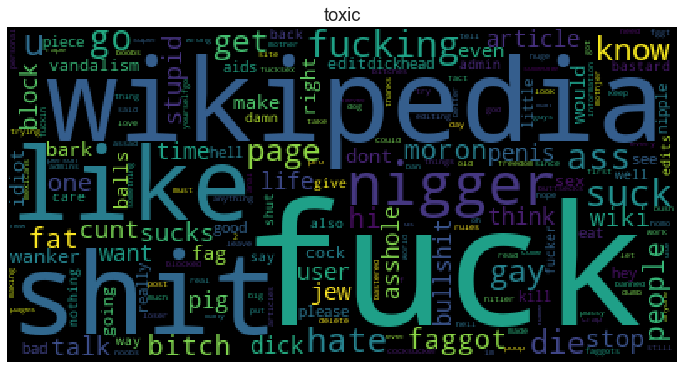

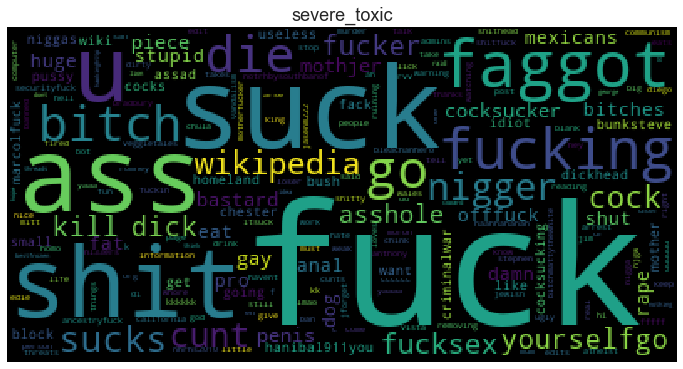

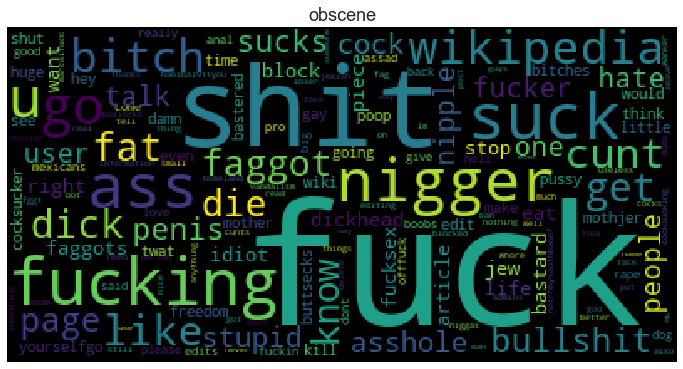

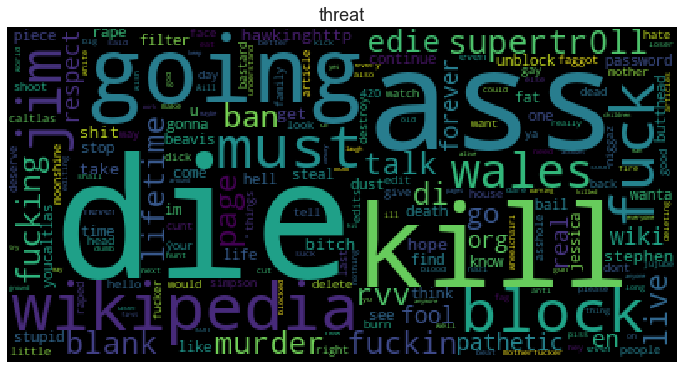

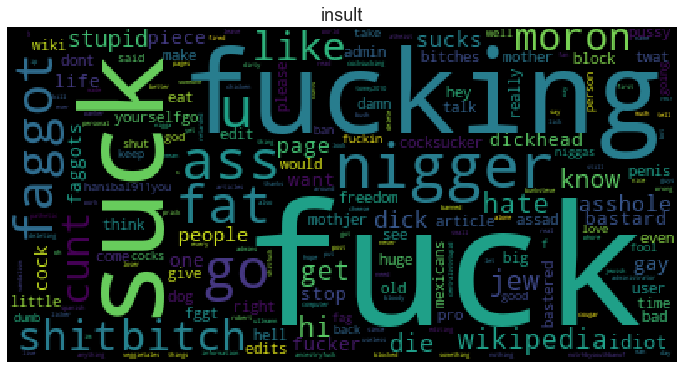

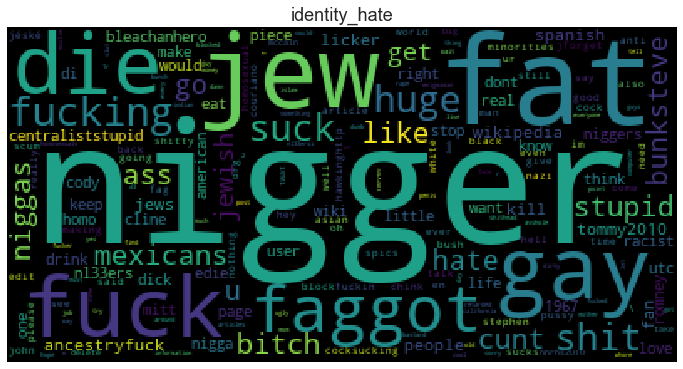

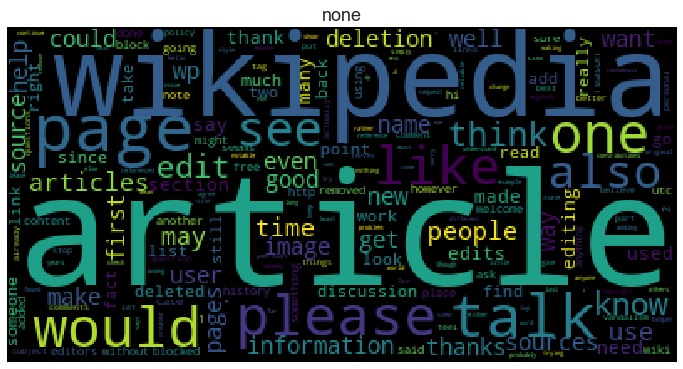

In [26]:

for w in word_counter:
    wc = word_counter[w]

    wordcloud = WordCloud(
          background_color='black',
          max_words=200,
          max_font_size=100, 
          random_state=4561
         ).generate_from_frequencies(wc.to_dict()['count'])

    fig = plt.figure(figsize=(12, 8))
    plt.title(w)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

# working with missing values


In [27]:
data1.isnull()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,total_length,new_line,new_small_space,new_medium_space,new_big_space,uppercase_words,question_mark,exclamation_mark
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
#Get a count of missing values in the dataset
data1.apply(lambda x: sum(x.isnull()),axis=0)

id                  0
comment_text        0
toxic               0
severe_toxic        0
obscene             0
threat              0
insult              0
identity_hate       0
none                0
total_length        0
new_line            0
new_small_space     0
new_medium_space    0
new_big_space       0
uppercase_words     0
question_mark       0
exclamation_mark    0
dtype: int64

# spliting the data


In [33]:
df=pd.read_csv("train.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \r\n\r\nThat...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \r\n\r\nUmm, theres no actual article ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [34]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [35]:
types = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

sampled_train1 = df[(df['toxic'] ==0) & (df['severe_toxic'] ==0) & (df['obscene'] ==0)
                       & (df['threat'] ==0) & (df['insult'] ==0) & (df['identity_hate'] ==0)][:20000]

sampled_train2 = df[(df['toxic'] !=0) | (df['severe_toxic'] !=0) | (df['obscene'] !=0) 
                | (df['threat'] !=0) | (df['insult'] !=0) | (df['identity_hate'] !=0)][:10000]

In [36]:
sampled_train = sampled_train2.append(sampled_train1)
sampled_train = sampled_train.sample(frac=1)

In [37]:
sampled_train.head(15000)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
14173,2567f01760f5f682,"Some helpful advice ) \r\n\r\nLook shithead, w...",0,0,1,0,1,1
10198,1afe31fa53016a70,"In addition, please note that this constitutes...",0,0,0,0,0,0
20878,37180853af4e6baf,"""\r\n\r\n """"Rave""""Reviews \r\n\r\nYour type of...",0,0,0,0,0,0
38416,6690c044371bc96f,"— | Talk I, who am coming in from the wild,...",0,0,1,0,0,0
17015,2ce6a599ca85b257,"Sure, but that's just one of the three outcome...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10732,1c5fc25a69825cf8,waterborne parasites and aquatic predators \r\...,0,0,0,0,0,0
29774,4f04c1c73da3314f,Never mind you are another slimebag who banned...,1,0,1,0,1,0
91219,f3fcd446a7a085b2,"No, Assfuckers (has a nice ring to it D) use i...",1,0,1,0,1,0
19173,32a1f0f119db7239,"Yeah, quit advertising \r\n\r\nSteve doesn't o...",0,0,0,0,0,0


In [38]:
toxic=sampled_train[:][:30000]

In [39]:
toxic.reset_index(inplace = True)

In [40]:
toxic

,index,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,14173,2567f01760f5f682,"Some helpful advice ) \r\n\r\nLook shithead, w...",0,0,1,0,1,1
1,10198,1afe31fa53016a70,"In addition, please note that this constitutes...",0,0,0,0,0,0
2,20878,37180853af4e6baf,"""\r\n\r\n """"Rave""""Reviews \r\n\r\nYour type of...",0,0,0,0,0,0
3,38416,6690c044371bc96f,"— | Talk I, who am coming in from the wild,...",0,0,1,0,0,0
4,17015,2ce6a599ca85b257,"Sure, but that's just one of the three outcome...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
29995,1987,055eb49939be33e6,"I always thought peperoncini were the small, r...",0,0,0,0,0,0
29996,704,01e8a06b926e75f9,"I feel like I'm out of ideas for now, so maybe...",0,0,0,0,0,0
29997,20716,36b2034b1abb2513,"Help? \r\n\r\nUm, is there any other vandal-fi...",0,0,0,0,0,0
29998,22045,3a18e4a065a940da,"""\r\n\r\nMistake in vandalism reversal\r\n\r\n...",0,0,0,0,0,0


In [41]:
toxic['comment_text']

0        Some helpful advice ) \r\n\r\nLook shithead, w...
1        In addition, please note that this constitutes...
2        "\r\n\r\n ""Rave""Reviews \r\n\r\nYour type of...
3        —   | Talk  I, who am coming in from the wild,...
4        Sure, but that's just one of the three outcome...
                               ...                        
29995    I always thought peperoncini were the small, r...
29996    I feel like I'm out of ideas for now, so maybe...
29997    Help? \r\n\r\nUm, is there any other vandal-fi...
29998    "\r\n\r\nMistake in vandalism reversal\r\n\r\n...
29999    WikiProject Films March 2010 Newsletter\r\nThe...
Name: comment_text, Length: 30000, dtype: object

In [42]:

toxic_labels = toxic[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
toxic_labels.head(30000)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,1,0,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,0,0,0,0,0,0
29997,0,0,0,0,0,0
29998,0,0,0,0,0,0


In [43]:
import re
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
X=[]
for i in range(0,30000):
        comment = toxic['comment_text'][i]
        comment = re.sub('[^a-zA-Z]', ' ', comment)
        comment = comment.lower()
        comment = comment.split()
        comment = [ps.stem(word) for word in comment if not word in set(stopwords.words('english'))]
        comment = ' '.join(comment)
        X.append(comment)

In [44]:
X[:8]

['help advic look shithead fuck delet redirect clit rock butt rock perfectli synonym name articl redirect cours must one music ignor philistin faggot seem crawl internet tell give help retard poof find way go back time go back year infant go hous grew tell bitch ass mother keep drop head tell ho magic develop symptom syndrom grew older much becom mindless vanda fight admin gnome wikipedia caus product thing hope take wrong way tri help somebodi far less mental facil best luck futur rememb thank medic advanc syndrom patient slowli get integr normal societi hope yet',
 'addit pleas note constitut deliber introduct fals inform aka vandal',
 'rave review type subject write place wikipedia saw anoth exampl bulli bludgeon behavior yeezu album talk page editor disagre respect show great commonsens resort name call b littl wiki term twist cannot say term rave review subject yeezu also receiv terribl review say receiv rave defin term refer need tri adher wikpedia polici rule spirit disappoint s

In [45]:
from nltk.tokenize import sent_tokenize, word_tokenize 
token=[]
for i in X:
    token.append(word_tokenize(i))

In [46]:
token

[['help',
  'advic',
  'look',
  'shithead',
  'fuck',
  'delet',
  'redirect',
  'clit',
  'rock',
  'butt',
  'rock',
  'perfectli',
  'synonym',
  'name',
  'articl',
  'redirect',
  'cours',
  'must',
  'one',
  'music',
  'ignor',
  'philistin',
  'faggot',
  'seem',
  'crawl',
  'internet',
  'tell',
  'give',
  'help',
  'retard',
  'poof',
  'find',
  'way',
  'go',
  'back',
  'time',
  'go',
  'back',
  'year',
  'infant',
  'go',
  'hous',
  'grew',
  'tell',
  'bitch',
  'ass',
  'mother',
  'keep',
  'drop',
  'head',
  'tell',
  'ho',
  'magic',
  'develop',
  'symptom',
  'syndrom',
  'grew',
  'older',
  'much',
  'becom',
  'mindless',
  'vanda',
  'fight',
  'admin',
  'gnome',
  'wikipedia',
  'caus',
  'product',
  'thing',
  'hope',
  'take',
  'wrong',
  'way',
  'tri',
  'help',
  'somebodi',
  'far',
  'less',
  'mental',
  'facil',
  'best',
  'luck',
  'futur',
  'rememb',
  'thank',
  'medic',
  'advanc',
  'syndrom',
  'patient',
  'slowli',
  'get',
  'inte

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000,stop_words='english')
X1 = cv.fit_transform(X).toarray()

In [48]:
X1.shape

(30000, 1000)

In [49]:
y = toxic_labels.values

In [50]:
y.shape

(30000, 6)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=0)

In [52]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
X_train.shape

(24000, 1000)

In [54]:
y_train.shape

(24000, 6)

In [55]:
y_test.shape

(6000, 6)

In [56]:
X_test.shape


(6000, 1000)

In [57]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framewo

In [79]:

model = Sequential()

model.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 1000))

model.add(Dense(output_dim = 32, init = 'uniform', activation = 'relu'))

model.add(Dense(output_dim = 6, init = 'uniform', activation = 'sigmoid'))

C:\Users\MANEESHA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1000, units=64, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MANEESHA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  """
C:\Users\MANEESHA\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=6, kernel_initializer="uniform")`
  import sys


In [59]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [60]:
model.fit(X_train,y_train,batch_size=128,epochs=30)


Epoch 1/30
24000/24000 [==============================] - 2s 97us/step - loss: 0.3861 - accuracy: 0.8798
Epoch 2/30
24000/24000 [==============================] - 1s 35us/step - loss: 0.2221 - accuracy: 0.9178
Epoch 3/30
24000/24000 [==============================] - 1s 34us/step - loss: 0.1846 - accuracy: 0.9326
Epoch 4/30
24000/24000 [==============================] - 1s 34us/step - loss: 0.1652 - accuracy: 0.9383
Epoch 5/30
24000/24000 [==============================] - 1s 35us/step - loss: 0.1535 - accuracy: 0.9415
Epoch 6/30
24000/24000 [==============================] - 2s 81us/step - loss: 0.1475 - accuracy: 0.9432 1s - loss: 0.1471 - 
Epoch 7/30
24000/24000 [==============================] - 1s 34us/step - loss: 0.1437 - accuracy: 0.9438
Epoch 8/30
24000/24000 [==============================] - 1s 33us/step - loss: 0.1404 - accuracy: 0.9443
Epoch 9/30
24000/24000 [==============================] - 1s 32us/step - loss: 0.1380 - accuracy: 0.9450
Epoch 10/30
24000/24000 [========

In [61]:
model.save("toxic_comments.h5")

In [62]:
y_pred=model.predict(X_test)

In [63]:
y_pred=y_pred>0.5

In [64]:
y_pred

array([[ True, False, False, False, False, False],
       [ True,  True,  True, False,  True,  True],
       [ True, False,  True, False,  True, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [65]:
y_test

array([[1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [66]:
score = model.evaluate(X_test, y_test)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

6000/6000 [==============================] - 1s 93us/step
Test Score: 0.23472305023670195
Test Accuracy: 0.9366666078567505


In [67]:
r=model.predict(cv.transform(["She is very good"]))
r

array([[0.08082038, 0.0019668 , 0.01089647, 0.00436467, 0.01669108,
        0.00204786]], dtype=float32)

In [68]:
r=r>0.5
r

array([[False, False, False, False, False, False]])

In [69]:
r=model.predict(cv.transform(["she is cruel"]))
r

array([[0.3441577 , 0.00443852, 0.04749611, 0.00680035, 0.06596898,
        0.0026751 ]], dtype=float32)

In [70]:
r=r<0.5
r

array([[ True,  True,  True,  True,  True,  True]])

In [71]:
r=model.predict(cv.transform(["bad"]))
r

array([[0.5584825 , 0.00764796, 0.08437395, 0.01246625, 0.1124457 ,
        0.00297885]], dtype=float32)

In [72]:
r=model.predict(cv.transform(["fuck off"]))
r

array([[0.99824905, 0.19051608, 0.99075073, 0.02261448, 0.6756576 ,
        0.01924451]], dtype=float32)

In [1]:
!pip install TextBlob